## Mark EDA for Housing Project

### Import Libraries and Load Data

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load the provided data set (csv)
plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')


In [4]:
print(df.shape)
display(df.info())
display('-'*60)
display(df.isnull().any())
display(df.isnull().sum())
display('-'*60)
df.head()

(21597, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

'------------------------------------------------------------'

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'------------------------------------------------------------'

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


None

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
df.zipcode.nunique()

70

In [15]:
n = df.nunique(axis=0) 
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64


In [18]:
# Seperate groups of features into seperate dataframes: counts, size, condition
df_counts = df[['price','floors', 'bedrooms', 'bathrooms', 'waterfront', 'view']]
df_counts.head()

,price,floors,bedrooms,bathrooms,waterfront,view
0,221900.0,1.0,3,1.00,NaN,0.0
1,538000.0,2.0,3,2.25,0.0,0.0
2,180000.0,1.0,2,1.00,0.0,0.0
3,604000.0,1.0,4,3.00,0.0,0.0
4,510000.0,1.0,3,2.00,0.0,0.0


In [19]:
df_condition = df[['price','condition', 'grade', 'yr_built', 'yr_renovated']]
df_condition.head()

,price,condition,grade,yr_built,yr_renovated
0,221900.0,3,7,1955,0.0
1,538000.0,3,7,1951,1991.0
2,180000.0,3,6,1933,NaN
3,604000.0,5,7,1965,0.0
4,510000.0,3,8,1987,0.0


In [20]:
df_size = df[['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']]
df_size.head()

,price,sqft_lot,sqft_living,sqft_above,sqft_basement,sqft_lot15,sqft_living15
0,221900.0,5650,1180,1180,0.0,5650,1340
1,538000.0,7242,2570,2170,400.0,7639,1690
2,180000.0,10000,770,770,0.0,8062,2720
3,604000.0,5000,1960,1050,910.0,5000,1360
4,510000.0,8080,1680,1680,0.0,7503,1800


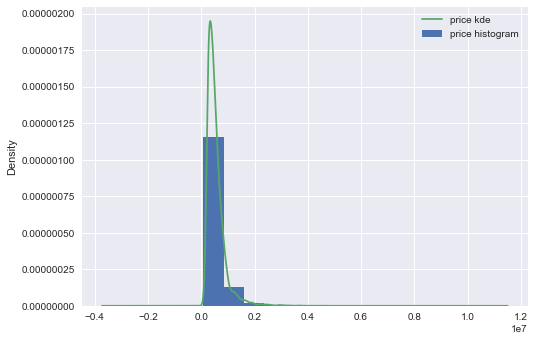

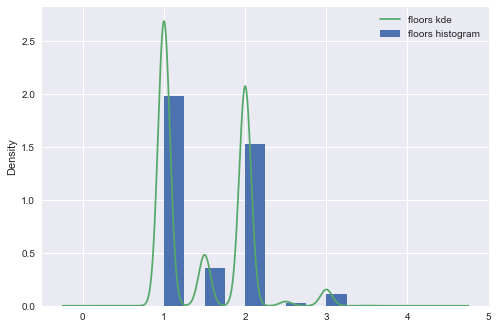

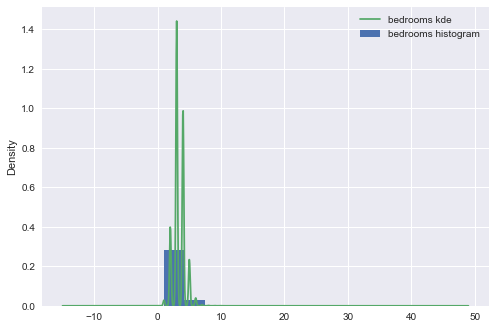

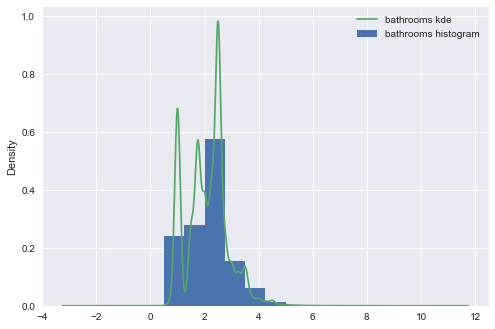

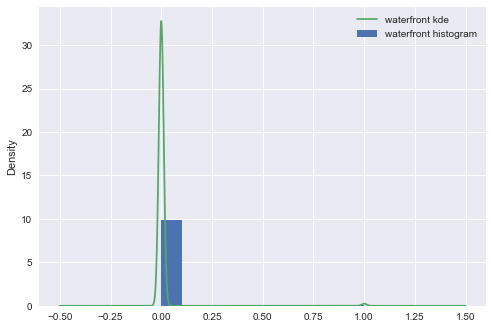

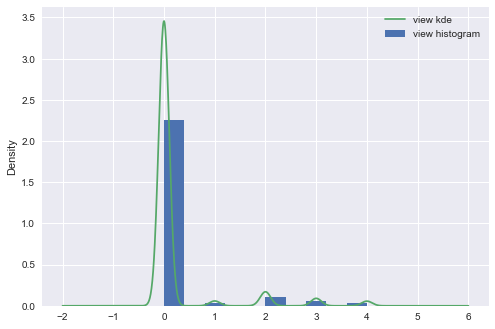

In [21]:
# Take a look at the distributions of some key features
for column in df_counts:
    df_counts[column].plot.hist(density=True, label = column+' histogram')
    df_counts[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

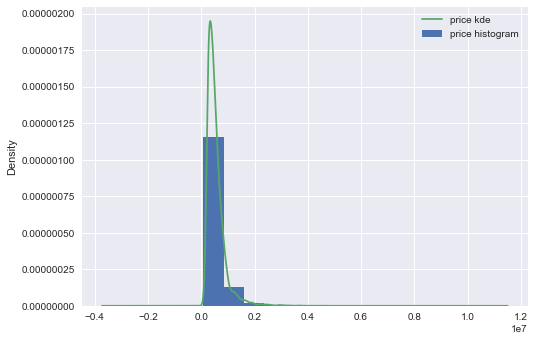

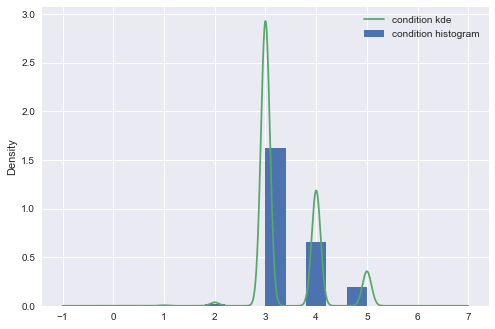

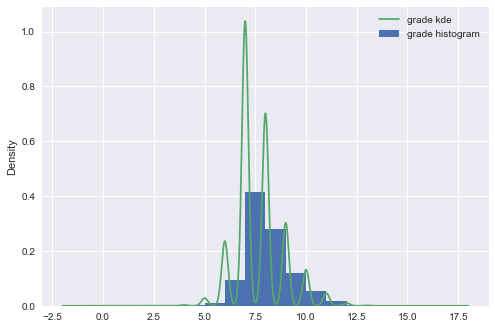

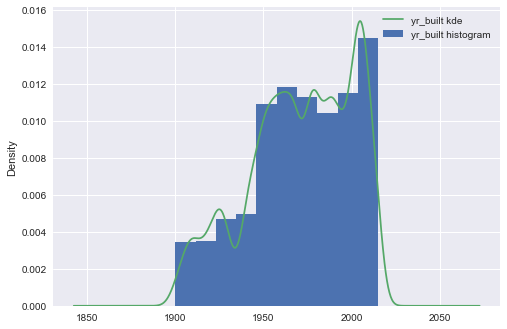

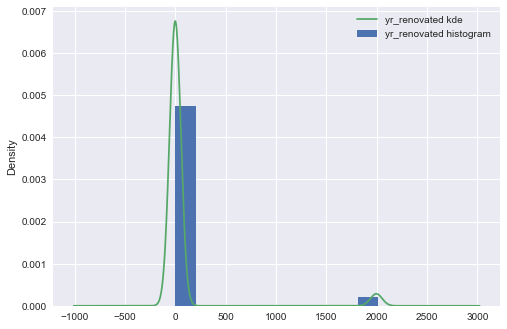

In [22]:
for column in df_condition:
    df_condition[column].plot.hist(density=True, label = column+' histogram')
    df_condition[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

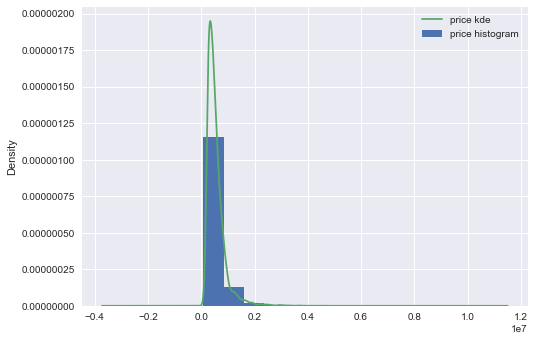

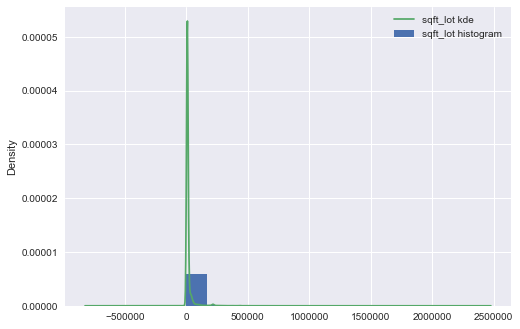

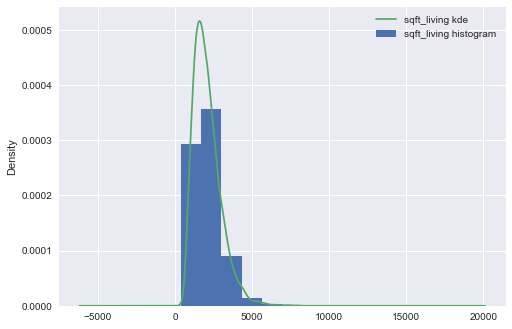

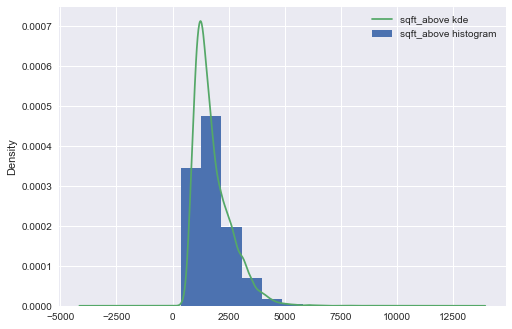

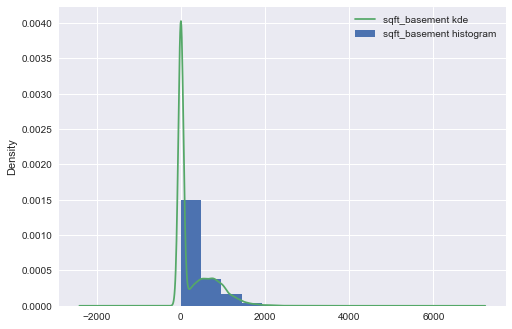

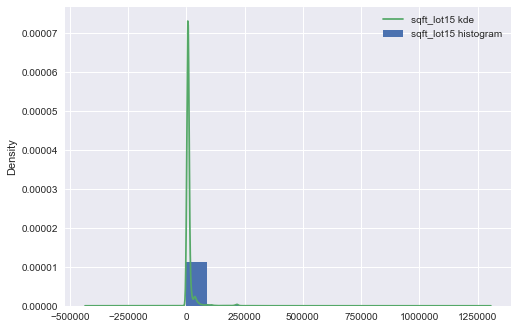

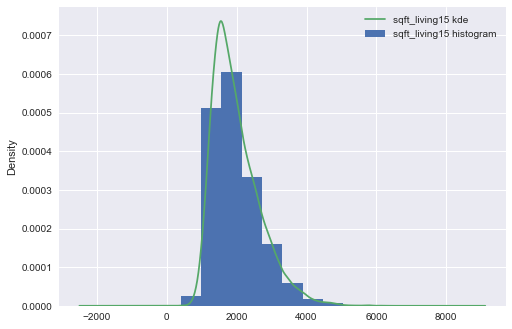

In [23]:
for column in df_size:
    df_size[column].plot.hist(density=True, label = column+' histogram')
    df_size[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

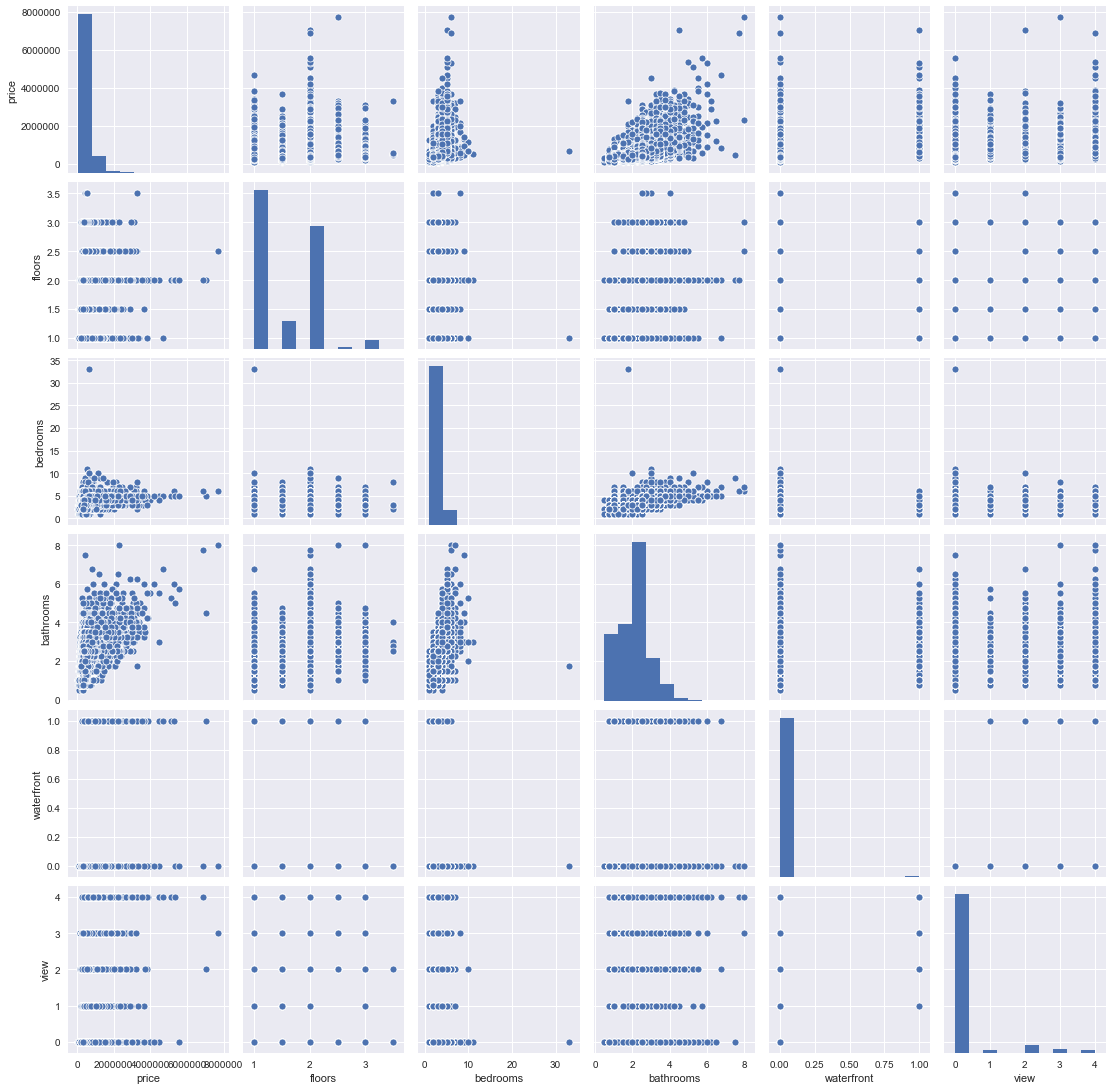

In [24]:
# Take a look at scatter plots and look for linear relationships
# sns.pairplot(data[['GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']])
sns.pairplot(df_counts)

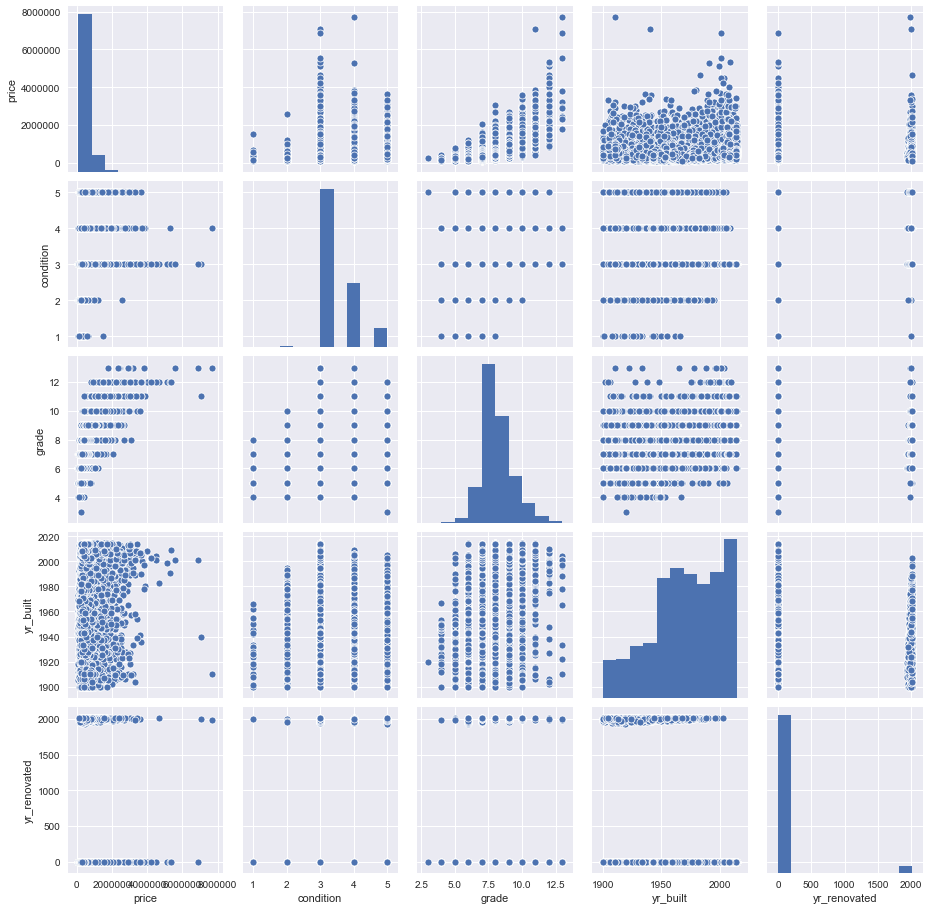

In [25]:
sns.pairplot(df_condition)

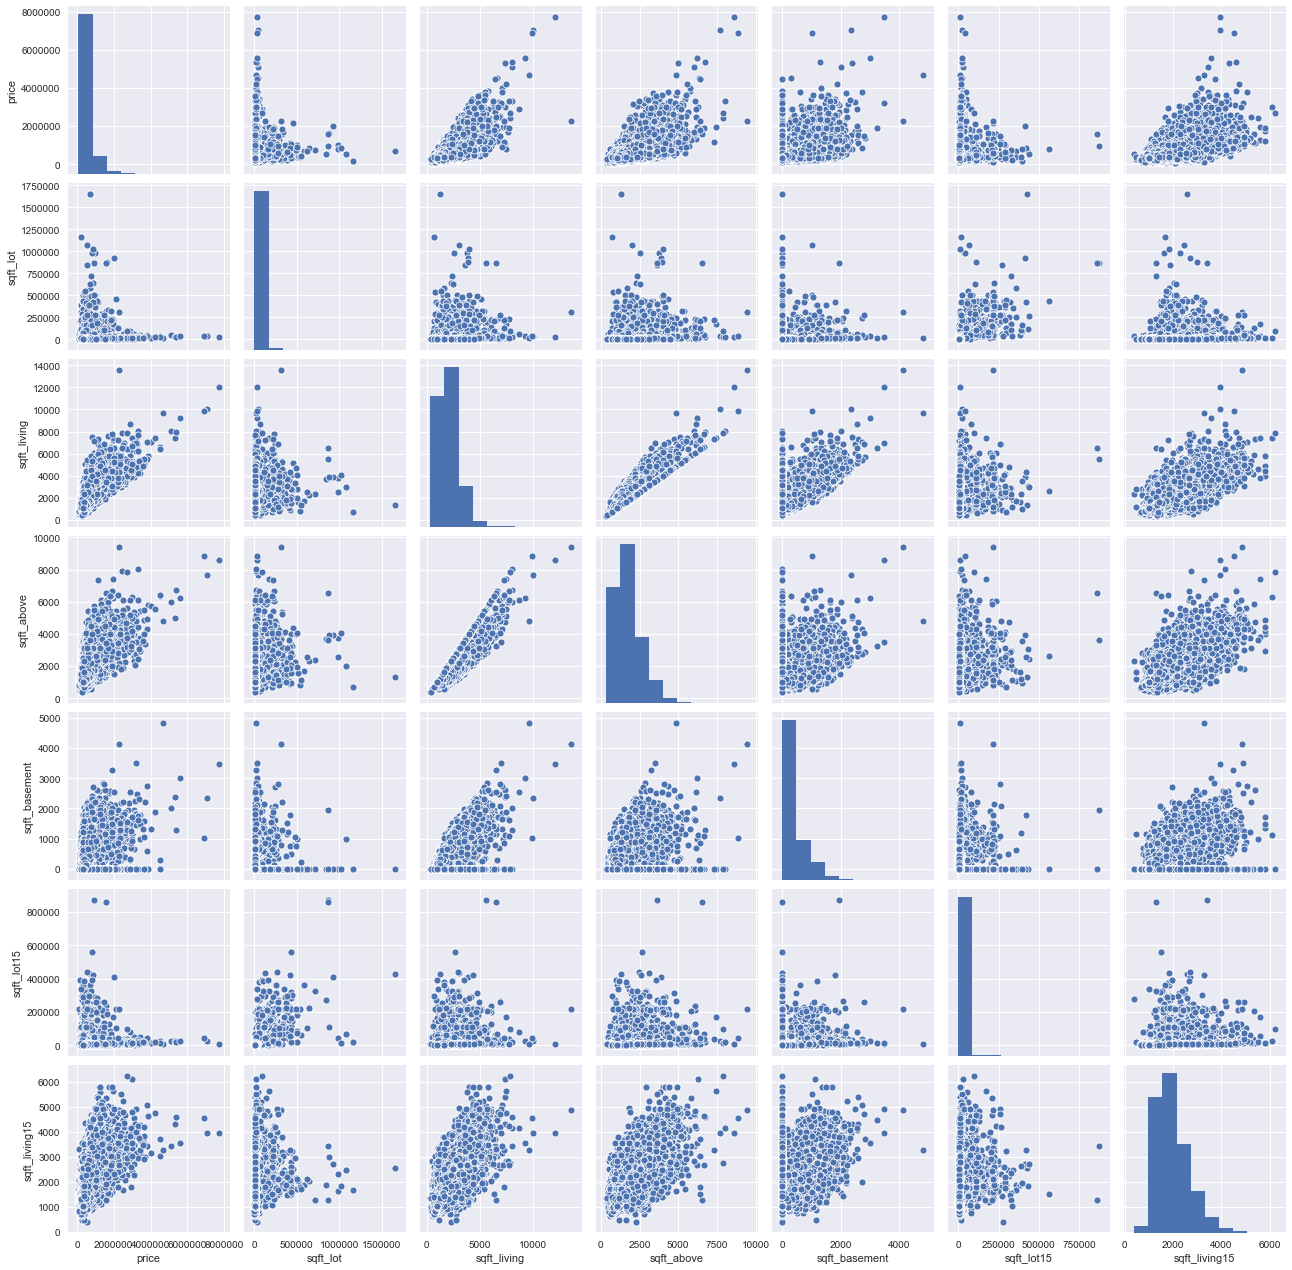

In [26]:
sns.pairplot(df_size)

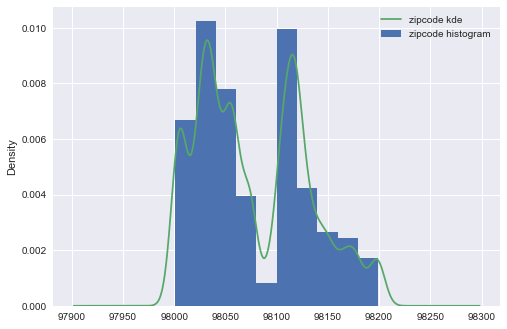

In [30]:
# forgot to look at zipcode... 
df.zipcode.plot.hist(density=True, label = 'zipcode histogram')
df.zipcode.plot.kde(label ='zipcode kde')
plt.legend()
plt.show()

In [32]:
# Take a look at correlations between variables
# first drop a few unnecessary columns (id, date, lat, long)
df_1 = df.drop(['id', 'date', 'lat', 'long'], axis=1)

In [33]:
df_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.325008,0.053953,0.129599,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.302683,0.155670,0.018495,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.282693,0.507173,0.051050,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.434576,0.318152,0.055660,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015533,0.052946,0.004513,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.245144,0.489193,0.003535,-0.059541,0.280102,-0.010722
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.090200,-0.026079,0.087244,0.031057,0.088860,0.032002
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.276521,-0.054564,0.100964,0.085277,0.279561,0.073332
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.170972,-0.361592,-0.061858,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.168023,0.447865,0.016669,-0.185771,0.713867,0.120981


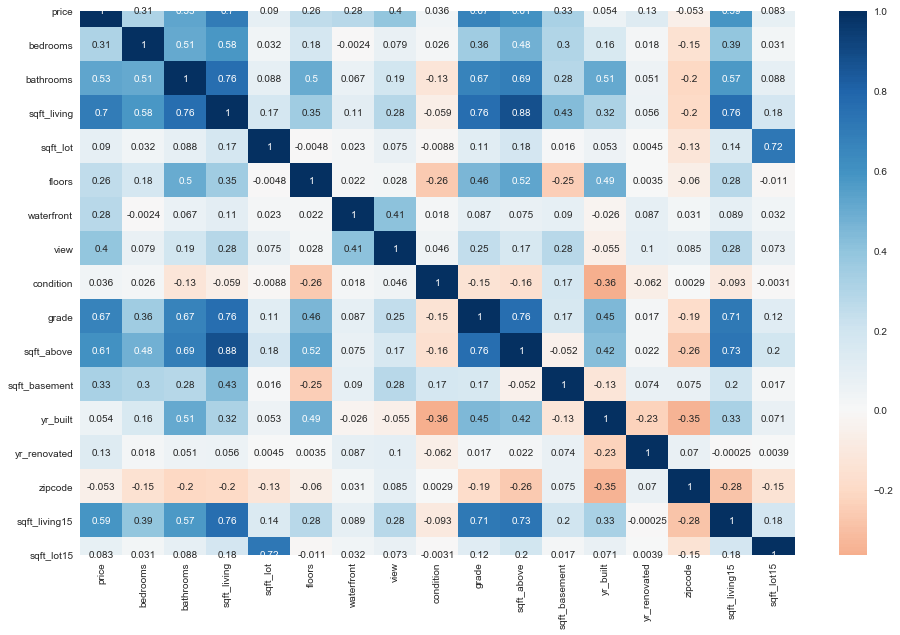

In [41]:
corr = df_1.corr()
display(corr)
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap='RdBu', annot=True, center=0)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

In [42]:
# Change nulls to 0 for 4 columns
df_2 = df_1.replace(np.NaN, 0.0)


In [45]:
df_2.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,2390,7570


In [44]:
df_2.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [66]:
# get rid of outliers for price (2 SD from mean)
# get rid of 33 value in bedrooms
df2_remove = df_2[(np.abs(stats.zscore(df_2['price']) < 2))]

In [81]:
df2_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


In [86]:
df2_remove = df2_remove.loc[df2_remove['bedrooms'] < 33]

In [88]:
df2_remove.shape

(20755, 17)

In [70]:
df2_remove['bedrooms'].unique()
df2_remove['bedrooms'].value_counts()

3     9666
4     6470
2     2744
5     1392
6      238
1      196
7       32
8        9
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [75]:
df2_remove['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3030
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
3.75     102
4.00      83
0.75      71
4.50      55
4.25      37
5.00      10
1.25       8
4.75       5
5.25       4
0.50       4
5.50       2
5.75       1
6.00       1
7.50       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64

In [76]:
df_2['floors'].unique()
df2_remove['floors'].value_counts()

1.0    10502
2.0     7691
1.5     1859
3.0      578
2.5      120
3.5        6
Name: floors, dtype: int64

In [73]:
print(df_2.shape)
print(df2_remove.shape)

(21597, 17)
(20756, 17)


In [77]:
df2_remove['view'].value_counts()

0.0    19067
2.0      843
3.0      383
1.0      286
4.0      177
Name: view, dtype: int64

In [78]:
df2_remove['waterfront'].value_counts()

0.0    20694
1.0       62
Name: waterfront, dtype: int64

In [79]:
df2_remove['condition'].value_counts()

3    13481
4     5486
5     1592
2      169
1       28
Name: condition, dtype: int64

In [80]:
df2_remove['grade'].value_counts()

7     8967
8     5996
9     2421
6     2038
10     861
5      242
11     195
4       27
12       8
3        1
Name: grade, dtype: int64

In [90]:
# Create dummies for grade
grade_dummies = pd.get_dummies(df2_remove['grade'], prefix='grade', drop_first=True)
# df2_remove = train4.drop(['OverallQual'], axis=1)
df3_remove = pd.concat([df2_remove, grade_dummies], axis=1)
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,5650,0,0,0,1,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,7639,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,8062,0,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,5000,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,7503,0,0,0,0,1,0,0,0,0


In [91]:
# Cut outliers for bathroom, then create dummies
df3_remove = df3_remove[(np.abs(stats.zscore(df3_remove['bathrooms']) < 2))]
df3_remove['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3029
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
0.75      71
1.25       8
0.50       4
Name: bathrooms, dtype: int64

In [92]:
# Create dummies for bathrooms
bathrooms_dummies = pd.get_dummies(df3_remove['bathrooms'], prefix='bath', drop_first=True)
# df2_remove = train4.drop(['OverallQual'], axis=1)
df3_remove = pd.concat([df3_remove, bathrooms_dummies], axis=1)
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,0,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,0,0,1,0,0,0,0,0,0


In [93]:
pd.set_option('display.max_columns', None)

In [94]:
df3_remove.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [95]:
# Create train, text split
train, test = train_test_split(df3_remove)

In [97]:
train.shape

(15339, 38)

In [98]:
test.shape

(5113, 38)

In [99]:
# save df3_remove as csv file
df3_remove.to_csv(r'data/df3clean.csv')